In [8]:
# Importing necessary libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
crime = pd.read_csv("/Users/samuelbamgbola/Downloads/Crime-HamoyeAI-Capstone-Project/africa_crime.csv")

In [5]:
crime.shape

(315940, 31)

In [6]:
crime.head()

,EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP
0,ALG1,1997-01-01,1997,1,Political violence,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,...,Douaouda,36.672,2.789,1,Algeria Watch,Other,5 January: Beheading of 5 citizens in Douaouda...,5,NaN,1582579226
1,ALG2,1997-01-02,1997,1,Political violence,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,...,Hassasna,36.133,0.883,1,Algeria Watch,Other,Two citizens were beheaded in Hassasna.,2,NaN,1582579226
2,ALG3,1997-01-03,1997,1,Political violence,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,...,Hassi El Abed,34.966,-0.290,1,Algeria Watch,Other,Two citizens were killed in a raid on the vill...,2,NaN,1582579226
3,ALG4,1997-01-04,1997,1,Political violence,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,...,Blida,36.469,2.829,1,Algeria Watch,Other,4 January: 16 citizens were murdered in the vi...,16,NaN,1582579226
4,ALG5,1997-01-05,1997,1,Political violence,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,...,Douaouda,36.672,2.789,1,Algeria Watch,Other,5 January: Killing of 18 citizens in the Olivi...,18,NaN,1582579226


In [7]:
crime.isna().sum()

EVENT_ID_CNTY              0
EVENT_DATE                 0
YEAR                       0
TIME_PRECISION             0
DISORDER_TYPE              0
EVENT_TYPE                 0
SUB_EVENT_TYPE             0
ACTOR1                     0
ASSOC_ACTOR_1         231997
INTER1                     0
ACTOR2                 86136
ASSOC_ACTOR_2         253699
INTER2                     0
INTERACTION                0
CIVILIAN_TARGETING    220363
ISO                        0
REGION                     0
COUNTRY                    0
ADMIN1                     2
ADMIN2                  2451
ADMIN3                161453
LOCATION                   0
LATITUDE                   0
LONGITUDE                  0
GEO_PRECISION              0
SOURCE                     0
SOURCE_SCALE               0
NOTES                      0
FATALITIES                 0
TAGS                  255561
TIMESTAMP                  0
dtype: int64

In [9]:
## Checking missing values in different columns

In [10]:
missing_admin2 = crime.loc[crime['ADMIN2'].isna()]

In [11]:
missing_admin2.groupby(['COUNTRY'])['COUNTRY'].count()

COUNTRY
Algeria                                         776
Benin                                             1
Comoros                                          11
Democratic Republic of Congo                    796
Lesotho                                         220
Mauritius                                       357
Mayotte                                         121
Nigeria                                           1
Republic of Congo                                 1
Reunion                                           2
Rwanda                                          127
Saint Helena, Ascension and Tristan da Cunha      2
Sao Tome and Principe                            25
Seychelles                                       11
Name: COUNTRY, dtype: int64

In [12]:
crime.loc[crime['COUNTRY']=='Seychelles'][['ADMIN1', 'ADMIN2', 'ADMIN3', 'LOCATION', 'LATITUDE', 'LONGITUDE']]

,ADMIN1,ADMIN2,ADMIN3,LOCATION,LATITUDE,LONGITUDE
176151,Bel Air,NaN,NaN,Victoria,-4.623,55.452
176152,Bel Air,NaN,NaN,Victoria,-4.623,55.452
176153,Bel Air,NaN,NaN,Victoria,-4.623,55.452
176154,Bel Air,NaN,NaN,Victoria,-4.623,55.452
176155,Bel Air,NaN,NaN,Victoria,-4.623,55.452
176156,Bel Air,NaN,NaN,Victoria,-4.623,55.452
176157,Bel Air,NaN,NaN,Victoria,-4.623,55.452
176158,Mont Fleuri,NaN,NaN,Mont Fleuri,-4.633,55.458
176159,Bel Air,NaN,NaN,Bel Air,-4.629,55.445
176160,Bel Air,NaN,NaN,Victoria,-4.623,55.452


### Defining Features for Selection

In [85]:
features = ['DISORDER_TYPE', 'REGION', 'COUNTRY', 'ADMIN1', 'LOCATION', 'EVENT_TYPE', 'SUB_EVENT_TYPE',
            'ACTOR1', 'INTER1', 'INTER2', 'INTERACTION']
target = ['FATALITIES']

In [86]:
crime.loc[crime['ACTOR1']=='Al Shabaab'].groupby('COUNTRY')['COUNTRY'].count()

COUNTRY
Djibouti        1
Ethiopia        4
Kenya         530
Somalia     11096
Tanzania        6
Uganda          3
Name: COUNTRY, dtype: int64

In [87]:
crime.loc[crime['ACTOR1']=='Al Shabaab'].groupby('ACTOR1')['FATALITIES'].sum()

ACTOR1
Al Shabaab    19739
Name: FATALITIES, dtype: int64

### Checking Missing Values in ADMIN1

In [88]:
missing_admin1 = crime.loc[crime['ADMIN1'].isna()]

In [89]:
missing_admin1[['COUNTRY', 'ADMIN1', 'ADMIN2', 'ADMIN3', 'LOCATION', 'LATITUDE', 'LONGITUDE']]

,COUNTRY,ADMIN1,ADMIN2,ADMIN3,LOCATION,LATITUDE,LONGITUDE
71777,Benin,NaN,NaN,NaN,Coast of Benin,6.237,2.164
155784,Nigeria,NaN,NaN,NaN,Gulf of Guinea,2.856,1.328


In [90]:
crime.loc[crime['LOCATION']=='Coast of Benin']

,EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP,fatalites-binned
71777,BEN400,2021-05-31,2021,1,Political violence,Violence against civilians,Attack,Pirates (Benin),NaN,3,...,6.237,2.164,3,AFP; Xinhua; Actu Benin,Subnational-International,"On 31 May 2021, sea pirates attacked a fishing...",0,NaN,1624310472,NO_FATALITY


In [91]:
crime.loc[crime['LOCATION']=='Gulf of Guinea']

,EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP,fatalites-binned
155784,NIG27797,2018-11-11,2018,1,Political violence,Battles,Armed clash,Military Forces of Nigeria (2015-),NaN,1,...,2.856,1.328,3,"Risk and Strategic Management, Corporation",Local partner-International,"On 11 November 2018, the Nigerian Navy interce...",0,NaN,1666026860,NO_FATALITY


### Feature Selection

In [92]:
X = crime[features]
y = crime["FATALITIES"]

In [93]:
X.shape

(315940, 11)

In [94]:
X.isna().sum()

DISORDER_TYPE     0
REGION            0
COUNTRY           0
ADMIN1            2
LOCATION          0
EVENT_TYPE        0
SUB_EVENT_TYPE    0
ACTOR1            0
INTER1            0
INTER2            0
INTERACTION       0
dtype: int64

In [95]:
# Dealing with missing values in ADMIN1

X.loc[71777:71777,'ADMIN1'] = "Oueme"
X.loc[155784:155784,'ADMIN1'] = "Bayelsa"

/Users/samuelbamgbola/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [96]:
X.isna().sum()

DISORDER_TYPE     0
REGION            0
COUNTRY           0
ADMIN1            0
LOCATION          0
EVENT_TYPE        0
SUB_EVENT_TYPE    0
ACTOR1            0
INTER1            0
INTER2            0
INTERACTION       0
dtype: int64

### Performing Binning on Fatalities

In [97]:
fatalities_bins = [-1, 0, 1, 10, 50, 100, 500, 1350]
group_names = ["NO_FATALITY", "1_FATALITY", "2_TO_10", "11_TO_50", "51_TO_100", "101_TO_500", "501_TO_1350"]

In [98]:
crime["fatalites-binned"] = pd.cut(crime["FATALITIES"], fatalities_bins, labels=group_names, include_lowest = True)
crime[['FATALITIES', 'fatalites-binned']].head()

,FATALITIES,fatalites-binned
0,5,2_TO_10
1,2,2_TO_10
2,2,2_TO_10
3,16,11_TO_50
4,18,11_TO_50


## Label Encoding on Target variable and other columns

In [99]:
from sklearn.preprocessing import LabelEncoder

In [100]:
encoder = LabelEncoder()

In [101]:
y = crime['fatalites-binned']

In [102]:
y = LabelEncoder().fit_transform(y)

In [120]:
crime['fatalities-binned-encoded'] = y

In [103]:
X['ADMIN1_encode'] = encoder.fit_transform(X['ADMIN1'])
X['LOCATION_encode'] = encoder.fit_transform(X['LOCATION'])
X['ACTOR1_encode'] = encoder.fit_transform(X['ACTOR1'])

/Users/samuelbamgbola/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/samuelbamgbola/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/samuelbamgbola/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

## Performing One Hot Encoding on some categorical features

In [104]:
X = pd.get_dummies(X, columns = ['DISORDER_TYPE', 'REGION', 'COUNTRY', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'INTER1', 'INTER2'])
X.head()

,ADMIN1,LOCATION,ACTOR1,INTERACTION,ADMIN1_encode,LOCATION_encode,ACTOR1_encode,DISORDER_TYPE_Demonstrations,DISORDER_TYPE_Political violence,DISORDER_TYPE_Political violence; Demonstrations,...,INTER1_8,INTER2_0,INTER2_1,INTER2_2,INTER2_3,INTER2_4,INTER2_5,INTER2_6,INTER2_7,INTER2_8
0,Tipaza,Douaouda,GIA: Armed Islamic Group,27,807,8778,1367,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,Relizane,Hassasna,GIA: Armed Islamic Group,27,684,12445,1367,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,Saida,Hassi El Abed,GIA: Armed Islamic Group,27,706,12451,1367,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,Blida,Blida,GIA: Armed Islamic Group,27,99,4705,1367,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,Tipaza,Douaouda,GIA: Armed Islamic Group,27,807,8778,1367,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [105]:
X['fatalites-binned'] = crime['fatalites-binned']

In [106]:
X.head()

,ADMIN1,LOCATION,ACTOR1,INTERACTION,ADMIN1_encode,LOCATION_encode,ACTOR1_encode,DISORDER_TYPE_Demonstrations,DISORDER_TYPE_Political violence,DISORDER_TYPE_Political violence; Demonstrations,...,INTER2_0,INTER2_1,INTER2_2,INTER2_3,INTER2_4,INTER2_5,INTER2_6,INTER2_7,INTER2_8,fatalites-binned
0,Tipaza,Douaouda,GIA: Armed Islamic Group,27,807,8778,1367,0,1,0,...,0,0,0,0,0,0,0,1,0,2_TO_10
1,Relizane,Hassasna,GIA: Armed Islamic Group,27,684,12445,1367,0,1,0,...,0,0,0,0,0,0,0,1,0,2_TO_10
2,Saida,Hassi El Abed,GIA: Armed Islamic Group,27,706,12451,1367,0,1,0,...,0,0,0,0,0,0,0,1,0,2_TO_10
3,Blida,Blida,GIA: Armed Islamic Group,27,99,4705,1367,0,1,0,...,0,0,0,0,0,0,0,1,0,11_TO_50
4,Tipaza,Douaouda,GIA: Armed Islamic Group,27,807,8778,1367,0,1,0,...,0,0,0,0,0,0,0,1,0,11_TO_50


In [107]:
X.drop(['ADMIN1', 'LOCATION', 'ACTOR1'], axis=1, inplace=True)

In [108]:
crime['EVENT_DATE']= pd.to_datetime(crime['EVENT_DATE'])

In [155]:
X['day_of_year'] = crime.EVENT_DATE.dt.dayofyear
X['month'] = crime.EVENT_DATE.dt.month
X['year'] = crime.EVENT_DATE.dt.year

In [156]:
X.head()

,INTERACTION,ADMIN1_encode,LOCATION_encode,ACTOR1_encode,DISORDER_TYPE_Demonstrations,DISORDER_TYPE_Political violence,DISORDER_TYPE_Political violence; Demonstrations,DISORDER_TYPE_Strategic developments,REGION_Eastern Africa,REGION_Middle Africa,...,INTER2_3,INTER2_4,INTER2_5,INTER2_6,INTER2_7,INTER2_8,fatalites-binned,day_of_year,month,year
0,27,807,8778,1367,0,1,0,0,0,0,...,0,0,0,0,1,0,2_TO_10,1,1,1997
1,27,684,12445,1367,0,1,0,0,0,0,...,0,0,0,0,1,0,2_TO_10,2,1,1997
2,27,706,12451,1367,0,1,0,0,0,0,...,0,0,0,0,1,0,2_TO_10,3,1,1997
3,27,99,4705,1367,0,1,0,0,0,0,...,0,0,0,0,1,0,11_TO_50,4,1,1997
4,27,807,8778,1367,0,1,0,0,0,0,...,0,0,0,0,1,0,11_TO_50,5,1,1997


### Preparing for Modelling

In [111]:
X_copy = X.iloc[:, 0:-4]

In [158]:
X_copy['day_of_year'] = X.day_of_year
X_copy['month'] = X.month
X_copy['year'] = X.year

In [113]:
X_copy.head()

,INTERACTION,ADMIN1_encode,LOCATION_encode,ACTOR1_encode,DISORDER_TYPE_Demonstrations,DISORDER_TYPE_Political violence,DISORDER_TYPE_Political violence; Demonstrations,DISORDER_TYPE_Strategic developments,REGION_Eastern Africa,REGION_Middle Africa,...,INTER2_2,INTER2_3,INTER2_4,INTER2_5,INTER2_6,INTER2_7,INTER2_8,day_of_year,month,year
0,27,807,8778,1367,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,1997
1,27,684,12445,1367,0,1,0,0,0,0,...,0,0,0,0,0,1,0,2,1,1997
2,27,706,12451,1367,0,1,0,0,0,0,...,0,0,0,0,0,1,0,3,1,1997
3,27,99,4705,1367,0,1,0,0,0,0,...,0,0,0,0,0,1,0,4,1,1997
4,27,807,8778,1367,0,1,0,0,0,0,...,0,0,0,0,0,1,0,5,1,1997


In [121]:
## Keeping track of encoded data and order of encoding

actor1_dict = dict(zip(crime.ACTOR1.unique(), X_copy.ACTOR1_encode.unique()))
actor1_dict_reverse = dict(zip(X_copy.ACTOR1_encode.unique(), crime.ACTOR1.unique()))

admin1_dict = dict(zip(crime.ADMIN1.unique(), X_copy.ADMIN1_encode.unique()))
admin1_dict_reverse = dict(zip(X_copy.ADMIN1_encode.unique(), crime.ADMIN1.unique()))

location_dict = dict(zip(crime.LOCATION.unique(), X_copy.LOCATION_encode.unique()))
location_dict_reverse = dict(zip(X_copy.LOCATION_encode.unique(), crime.LOCATION.unique()))

fatalities_dict = dict(zip(crime['fatalites-binned'].unique(), crime['fatalities-binned-encoded'].unique()))
fatalities_dict_reverse = dict(zip(crime['fatalities-binned-encoded'].unique(), crime['fatalites-binned'].unique()))


In [122]:
fatalities_dict

{'2_TO_10': 3,
 '11_TO_50': 1,
 '1_FATALITY': 2,
 'NO_FATALITY': 6,
 '51_TO_100': 5,
 '101_TO_500': 0,
 '501_TO_1350': 4}

In [124]:
record = X.copy()
record['fatalities-binned-encoded'] = crime['fatalities-binned-encoded']

In [129]:
record.head()

,INTERACTION,ADMIN1_encode,LOCATION_encode,ACTOR1_encode,DISORDER_TYPE_Demonstrations,DISORDER_TYPE_Political violence,DISORDER_TYPE_Political violence; Demonstrations,DISORDER_TYPE_Strategic developments,REGION_Eastern Africa,REGION_Middle Africa,...,INTER2_4,INTER2_5,INTER2_6,INTER2_7,INTER2_8,fatalites-binned,day_of_year,month,year,fatalities-binned-encoded
0,27,807,8778,1367,0,1,0,0,0,0,...,0,0,0,1,0,2_TO_10,1,1,1997,3
1,27,684,12445,1367,0,1,0,0,0,0,...,0,0,0,1,0,2_TO_10,2,1,1997,3
2,27,706,12451,1367,0,1,0,0,0,0,...,0,0,0,1,0,2_TO_10,3,1,1997,3
3,27,99,4705,1367,0,1,0,0,0,0,...,0,0,0,1,0,11_TO_50,4,1,1997,1
4,27,807,8778,1367,0,1,0,0,0,0,...,0,0,0,1,0,11_TO_50,5,1,1997,1


In [125]:
import pyarrow as pa
import pyarrow.parquet as pq

# Convert pandas DataFrame to pyarrow Table
table = pa.Table.from_pandas(record)

# Write pyarrow Table to Parquet file
pq.write_table(table, '/Users/samuelbamgbola/Downloads/Crime-HamoyeAI-Capstone-Project/africa_encoded_for_deployment.parquet')

### Spliting Data with StratifiedShuffleSplit to maintain the distribution of data among targets.

In [126]:
from sklearn.model_selection import StratifiedShuffleSplit

In [127]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

In [132]:
for train_index, test_index in sss.split(X_copy, crime['fatalities-binned-encoded']):
    train = X_copy.loc[train_index]
    test = X_copy.loc[test_index]

In [140]:
X_train = train.copy()
X_test = test.copy()

In [135]:
y_train = crime[['fatalities-binned-encoded']].loc[train_index]
y_test = crime[['fatalities-binned-encoded']].loc[test_index]

## Scaling Training Set with Standard Scaler

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
scaler = StandardScaler()

In [141]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Reducing dimensionality with PCA

In [143]:
from sklearn.decomposition import PCA

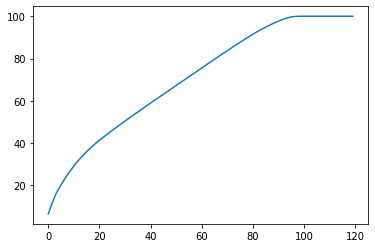

In [146]:
pca = PCA(n_components=120)
pca.fit(X_train_scaled)
#The amount of variance that each PC explains
var = pca.explained_variance_ratio_
#Cumulative Variance explains
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var)

In [147]:
var

array([  6.43,   9.9 ,  13.05,  15.98,  18.14,  20.18,  22.18,  24.1 ,
        25.82,  27.5 ,  29.15,  30.65,  32.07,  33.41,  34.71,  35.92,
        37.07,  38.2 ,  39.3 ,  40.33,  41.32,  42.27,  43.21,  44.14,
        45.06,  45.97,  46.87,  47.77,  48.66,  49.54,  50.41,  51.28,
        52.15,  53.01,  53.87,  54.72,  55.57,  56.42,  57.26,  58.1 ,
        58.94,  59.78,  60.61,  61.44,  62.27,  63.1 ,  63.93,  64.76,
        65.59,  66.42,  67.25,  68.08,  68.91,  69.74,  70.57,  71.4 ,
        72.23,  73.06,  73.89,  74.72,  75.55,  76.38,  77.21,  78.04,
        78.86,  79.68,  80.5 ,  81.32,  82.14,  82.95,  83.76,  84.56,
        85.36,  86.16,  86.95,  87.74,  88.52,  89.28,  90.04,  90.8 ,
        91.52,  92.24,  92.93,  93.61,  94.26,  94.89,  95.51,  96.11,
        96.68,  97.21,  97.73,  98.23,  98.69,  99.09,  99.45,  99.73,
        99.87,  99.99, 100.03, 100.05, 100.05, 100.05, 100.05, 100.05,
       100.05, 100.05, 100.05, 100.05, 100.05, 100.05, 100.05, 100.05,
      

#### Best number of components is 98.

In [144]:
pca = PCA(n_components=98)
pca_model = pca.fit(X_train_scaled)
X_train_scaled_pca = pca_model.transform(X_train_scaled)

In [145]:
X_test_pca = pca.transform(X_test_scaled)

## Computing sample weights based on distribution of target variable

In [148]:
from sklearn.utils import class_weight

In [149]:
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

## Training model

In [151]:
from xgboost import XGBClassifier

In [152]:
model = XGBClassifier(n_estimators=300, n_jobs = -1,booster='gbtree')

In [ ]:
xgb_model = model.fit(X_train_scaled_pca, y_train, sample_class=classes_weights)

In [ ]:
predictions = xgb_model.predict(X_test_pca)

## Evaluating model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [ ]:
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

In [ ]:
print(report)

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  